In [1]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7409 sha256=fe143ed3496b201caf2398d0642753b9f3f27a5c7478c5d0ca8538296ec3ae81
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil
Gen RAM Free: 15.5 GB  | Proc size: 241.7 MB
GPU RAM Free: 15109MB | Used: 0MB | Util   0% | Total 15109MB


In [2]:
# !free -h
!nvidia-smi

Mon Jul 10 10:31:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

# Environment

In [3]:
import os
import math

import numpy as np
import pandas as pd



from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# DATA

## Data loading

In [4]:
# #load data nhỏ
# !curl -LO https://github.com/AakashKumarNain/CaptchaCracker/raw/master/captcha_images_v2.zip
# !unzip -qq captcha_images_v2.zip

The dataset contains 1040 captcha files as `png` images. The label for each sample is a string,
the name of the file (minus the file extension).
We will map each character in the string to an integer for training the model. Similary,
we will need to map the predictions of the model back to strings. For this purpose
we will maintain two dictionaries, mapping characters to integers, and integers to characters,
respectively.

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename ))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/captcha-dataset/iBLx2.jpg
/kaggle/input/captcha-dataset/KyOyd.jpg
/kaggle/input/captcha-dataset/pz4L2.jpg
/kaggle/input/captcha-dataset/ZzpSw.jpg
/kaggle/input/captcha-dataset/9KrP5.jpg
/kaggle/input/captcha-dataset/NqsnV.jpg
/kaggle/input/captcha-dataset/3XDYA.jpg
/kaggle/input/captcha-dataset/8cG1Z.jpg
/kaggle/input/captcha-dataset/4k21z.jpg
/kaggle/input/captcha-dataset/3MYNZ.jpg
/kaggle/input/captcha-dataset/CScUs.jpg
/kaggle/input/captcha-dataset/1KcnQ.jpg
/kaggle/input/captcha-dataset/Nbv1s.jpg
/kaggle/input/captcha-dataset/kbhOL.jpg
/kaggle/input/captcha-dataset/YmGzB.jpg
/kaggle/input/captcha-dataset/1M2nr.jpg
/kaggle/input/captcha-dataset/NHHsl.jpg
/kaggle/input/captcha-dataset/RzNfD.jpg
/kaggle/input/captcha-dataset/hBdp8.jpg
/kaggle/input/captcha-dataset/eThUn.jpg
/kaggle/input/captcha-dataset/K1UyX.jpg
/kaggle/input/captcha-dataset/7xv21.jpg
/kaggle/input/captcha-dataset/axvRx.jpg
/kaggle/input/captcha-dataset/YzEKY.jpg
/kaggle/input/captcha-dataset/4qSfd.jpg


In [6]:
# Path to the data directory
# data_dir = Path("./captcha_images_v2/")
data_dir = Path("/kaggle/input/captcha-dataset/")

# Get list of all the images
images = sorted(list(map(str, list(data_dir.glob("*.jpg")))))
labels = [img.split(os.path.sep)[-1].split(".jpg")[0] for img in images]
characters = set(char for label in labels for char in label)#Set trong Python là tập hợp các phần tử duy nhất, không có thứ tự
characters = sorted(list(characters))

print("Number of images found: ", len(images))
print("Number of labels found: ", len(labels))
print("Number of unique characters: ", len(characters))
print("Characters present: ", characters)

# Batch size for training and validation
batch_size = 64

# Desired image dimensions
img_width = 200
img_height = 50

# Maximum length of any captcha in the dataset
max_length = max([len(label) for label in labels])

Number of images found:  113062
Number of labels found:  113062
Number of unique characters:  60
Characters present:  ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


## Preprocessing

In [7]:
X_train,X_val_test,y_train,y_val_test=train_test_split(images,labels,test_size=0.2,random_state=2023)
X_val,X_test,y_val,y_test=train_test_split(X_val_test,y_val_test,test_size=0.5,random_state=2023)

x_train=np.array(X_train)
x_val=np.array(X_val)
x_test=np.array(X_test)

y_train=np.array(y_train)
y_val=np.array(y_val)
y_test=np.array(y_test)

In [8]:
# Mapping characters to integers
char_to_num = layers.StringLookup(
    vocabulary=list(characters), mask_token=None
)

# Mapping integers back to original characters
num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)



def encode_single_sample(img_path, label):
    # 1. Read image
    img = tf.io.read_file(img_path)
    #print(img)
    # 2. Decode and convert to grayscale
    img = tf.io.decode_png(img, channels=3)#channels=1 để chuyển sang thang độ xám, để 3 nếu muốn nahr màu


    #print(img)
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    #print(img)
    # 4. Resize to the desired size
    img = tf.image.resize(img, [img_height, img_width])
    #print(img.shape)
    # 5. Transpose the image because we want the time
    # dimension to correspond to the width of the image.
    img = tf.transpose(img, perm=[1, 0, 2])# chuyển vị matrix hàng thành cột và cột thành hàng
    #print(img.shape)
    # 6. Map the characters in label to numbers
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    # 7. Return a dict as our model is expecting two inputs
    return {"image": img, "label": label}


## Create `Dataset` objects

In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
validation_dataset = (
    validation_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = (
    test_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

## Visualize the data

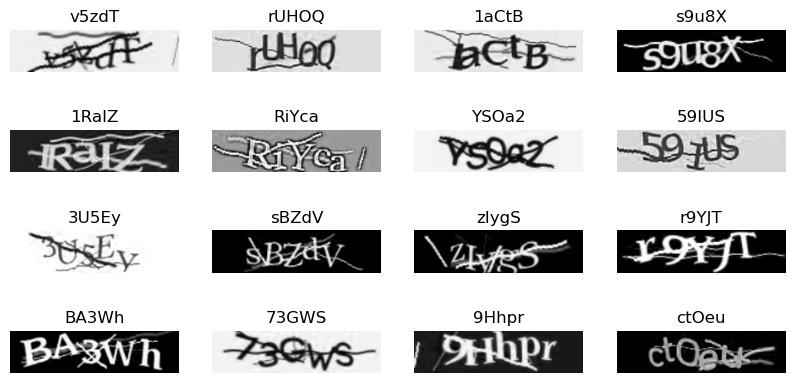

In [10]:
_, ax = plt.subplots(4, 4, figsize=(10, 5))
for batch in train_dataset.take(1):
    images = batch["image"]
    labels = batch["label"]
    for i in range(16):
        img = (images[i] * 255).numpy().astype("uint8")
        label = tf.strings.reduce_join(num_to_char(labels[i])).numpy().decode("utf-8")
        ax[i // 4, i % 4].imshow(img[:, :, 0].T, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")
plt.show()

# MODEL

## Building


In [11]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred

In [12]:
from tensorflow.keras.applications import ResNet50V2
keras.backend.clear_session()
# Tạo mô hình
model_test = ResNet50V2(include_top=False,weights='imagenet',input_shape=(200,50,3))# input_shape thay đổi thì kiến trúc model cx thay đổi
model_test.summary()
# In thông tin về đầu vào của mô hình
print("Input shape:", model_test.input_shape)
print("Output shape:", model_test.output_shape)

94668760/94668760 [==============================] - 0s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 50, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 56, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 25, 64)  9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2

In [13]:
base_model=keras.models.Model(
        model_test.get_layer(name="input_1").input, model_test.get_layer(name="conv2_block3_1_relu").output
)
base_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 50, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 56, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 25, 64)  9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 102, 27, 64)  0           ['conv1_conv[0][0]']         

In [14]:
def build_model():
    # Inputs to the model
    input_img = layers.Input(
        shape = (img_width, img_height, 3), name="image", dtype="float32"
    )
    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    base_model_ = base_model(input_img)
    print(base_model_)

    new_shape = (base_model.layers[-1].output_shape[-3], base_model.layers[-1].output_shape[-2]*base_model.layers[-1].output_shape[-1])
    x = layers.Reshape(target_shape=new_shape, name="reshape")(base_model_)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.05)(x)


    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    #print(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(
        len(char_to_num.get_vocabulary()) + 1, activation="softmax", name="dense2"
    )(x)# 50 vector (có len 21) phân phối xác suất thuộc về các lớp(20 lớp)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)# labels (5,);x(50,21)

    # Define the model
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="ocr_model_v1"
    )

    for layer in base_model.layers:
      layer.trainable = False
    # Optimizer
    opt = keras.optimizers.Adamax(beta_1=0.95,weight_decay=0.0001)#learning_rate=0.001 default
    # Compile the model and return
    model.compile(optimizer=opt)
    return model


# Get the model
model = build_model()
model.summary()
#NHÌN SUMMMARY ĐỂ HIỂU KIẾN TRÚC
#64*769=49216

KerasTensor(type_spec=TensorSpec(shape=(None, 50, 13, 64), dtype=tf.float32, name=None), name='model/conv2_block3_1_relu/Relu:0', description="created by layer 'model'")
Model: "ocr_model_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 200, 50, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 model (Functional)             (None, 50, 13, 64)   173568      ['image[0][0]']                  
                                                                                                  
 reshape (Reshape)              (None, 50, 832)      0           ['model[0][0]']                  
                

## Training

In [15]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [16]:
epochs = 100
early_stopping_patience = 20
# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
)
# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[early_stopping],
)

Epoch 1/1000
1414/1414 [==============================] - 432s 294ms/step - loss: 22.4410 - val_loss: 22.0288
Epoch 2/1000
1414/1414 [==============================] - 147s 104ms/step - loss: 21.3560 - val_loss: 21.2860
Epoch 3/1000
1414/1414 [==============================] - 145s 103ms/step - loss: 21.0480 - val_loss: 20.9622
Epoch 4/1000
1414/1414 [==============================] - 147s 104ms/step - loss: 20.8696 - val_loss: 20.7124
Epoch 5/1000
1414/1414 [==============================] - 139s 98ms/step - loss: 20.3774 - val_loss: 19.8106
Epoch 6/1000
1414/1414 [==============================] - 140s 99ms/step - loss: 19.1218 - val_loss: 18.1352
Epoch 7/1000
1414/1414 [==============================] - 142s 100ms/step - loss: 17.6442 - val_loss: 16.5099
Epoch 8/1000
1414/1414 [==============================] - 149s 105ms/step - loss: 16.3256 - val_loss: 15.2179
Epoch 9/1000
1414/1414 [==============================] - 144s 102ms/step - loss: 15.2202 - val_loss: 14.0181
Epoch 10/100

KeyboardInterrupt: 

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('OCR Model')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

NameError: name 'history' is not defined

# Evaluation

In [18]:
model.evaluate(validation_dataset)

177/177 [==============================] - 15s 86ms/step - loss: 4.1965


4.1964921951293945

In [20]:
model.evaluate(test_dataset)

177/177 [==============================] - 14s 76ms/step - loss: 4.2831


4.283050060272217

# Inference

In [23]:
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_length
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text

In [24]:
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)


## Val Set

In [25]:
preds = prediction_model.predict(validation_dataset)

pred_texts = decode_batch_predictions(preds)
print(pred_texts[0:5])
print(y_val[0:5])

y_true = y_val
correct_char = 0
total_char = 0
correct = 0
#xét từng cặp true,pred
# nếu true=pred thì số nhãn đoán đúng +1
# với mỗi kí tự trong true ss với kí tự trong pred ở vị trí tương ứng, nếu bằng số kí tự đúng +1
for i in range(len(y_true)):
    pr = pred_texts[i]
    tr = y_true[i]
    total_char += len(tr)
    for j in range(min(len(tr), len(pr))):
        if tr[j] == pr[j]:
            correct_char += 1

    if pr == tr :
        correct += 1

print('Valset correct characters predicted : %.2f%%' %(correct_char*100/total_char))#nếu muốn tính % sai hãy dùng Edit distance
print('Valset correct words predicted      : %.2f%%' %(correct*100/len(y_true)))

/opt/conda/lib/python3.10/site-packages/keras/engine/functional.py:639: UserWarning: Input dict contained keys ['label'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


177/177 [==============================] - 11s 51ms/step
['wGC8A', 'pJhn[UNK]', 'ALgSR', 'gsqBS', 'EFXCl']
['wGC8A' 'pJlha' 'AlgsR' 'geqBS' 'EFXCl']
Valset correct characters predicted : 74.73%
Valset correct words predicted      : 34.42%


In [ ]:
#  Let's check results on some validation samples
for batch in validation_dataset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]
    print(batch_images.shape)
    print(batch_labels.shape)
    preds = prediction_model.predict(batch_images)
    print(preds.shape)
    pred_texts = decode_batch_predictions(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)

    _, ax = plt.subplots(4, 4, figsize=(15, 5))# 4 hàng , 4 cột
    for i in range(len(pred_texts)):
      if i<16:# chỗ này có 16 ô để vẽ hình thôi nên để i>16 tức là vẽ nhiều hơn 16 hình thì lỗi
        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        img = img.T
        title = f"Prediction: {pred_texts[i]}"
        ax[i// 4, i % 4].imshow(img, cmap="gray")
        ax[i// 4, i % 4].set_title(title)
        ax[i// 4, i % 4].axis("off")
plt.show()

## Test Set

In [26]:
preds = prediction_model.predict(test_dataset)

pred_texts = decode_batch_predictions(preds)
print(pred_texts[0:5])
print(y_test[0:5])

y_true = y_test
correct_char = 0
total_char = 0
correct = 0
#xét từng cặp true,pred
# nếu true=pred thì số nhãn đoán đúng +1
# với mỗi kí tự trong true ss với kí tự trong pred ở vị trí tương ứng, nếu bằng số kí tự đúng +1
for i in range(len(y_true)):
    pr = pred_texts[i]
    tr = y_true[i]
    total_char += len(tr)
    for j in range(min(len(tr), len(pr))):
        if tr[j] == pr[j]:
            correct_char += 1

    if pr == tr :
        correct += 1

print('Testset correct characters predicted : %.2f%%' %(correct_char*100/total_char))#nếu muốn tính % sai hãy dùng Edit distance
print('Testset correct words predicted      : %.2f%%' %(correct*100/len(y_true)))

177/177 [==============================] - 8s 47ms/step
['SZqp9', 'JUNDz', 'LwDCR', 'Cabyv', 'BZbSZ']
['SZqp9' 'JUN5z' 'LwDcR' 'Qlbyv' 'BZ5SZ']
Testset correct characters predicted : 74.60%
Testset correct words predicted      : 34.27%


In [ ]:
#  Let's check results on some test samples
for batch in test_dataset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]
    print(batch_images.shape)
    print(batch_labels.shape)
    preds = prediction_model.predict(batch_images)
    print(preds.shape)
    pred_texts = decode_batch_predictions(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)

    _, ax = plt.subplots(4, 4, figsize=(15, 5))# 4 hàng , 4 cột
    for i in range(len(pred_texts)):
      if i<16:# chỗ này có 16 ô để vẽ hình thôi nên để i>16 tức là vẽ nhiều hơn 16 hình thì lỗi
        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        img = img.T
        title = f"Prediction: {pred_texts[i]}"
        ax[i// 4, i % 4].imshow(img, cmap="gray")
        ax[i// 4, i % 4].set_title(title)
        ax[i// 4, i % 4].axis("off")
plt.show()

# Save model

In [ ]:
%cd /content/drive/MyDrive/captcha/saved_model

In [ ]:
prediction_model.save('EfficientNetV2B3')

# Load Model

In [ ]:
load_model_pred=tf.keras.saving.load_model("ocr_model")

In [ ]:
for batch in validation_dataset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = load_model_pred.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)

    _, ax = plt.subplots(4, 4, figsize=(15, 5))
    for i in range(len(pred_texts)):
      if i<16:
        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        img = img.T
        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
plt.show()